In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
census = Path("census_county.csv", inex_col='Area Name')

In [3]:
# Read in census csv
census_df = pd.read_csv(census)

In [4]:
census_df

,Area Name,Year,External Area,External County,In-Migration,Out-Migration,Net Migration,Gross Migration
0,Alamance County,2017,Arizona,Pima County,0.0,9.0,-9.0,9.0
1,Alamance County,2017,California,Alameda County,0.0,15.0,-15.0,15.0
2,Alamance County,2017,Georgia,Muscogee County,2.0,0.0,2.0,2.0
3,Alamance County,2017,Iowa,Decatur County,0.0,3.0,-3.0,3.0
4,Alamance County,2017,Massachusetts,Plymouth County,15.0,0.0,15.0,15.0
...,...,...,...,...,...,...,...,...
193440,Yancey County,2020,Montana,Cascade County,15.0,0.0,15.0,15.0
193441,Yancey County,2020,New Jersey,Sussex County,11.0,0.0,11.0,11.0
193442,Yancey County,2020,North Carolina,Gaston County,15.0,0.0,15.0,15.0
193443,Yancey County,2020,North Carolina,Madison County,138.0,8.0,130.0,146.0


In [5]:
# Reduce columns to show only data we want
reduced_census = census_df[["Area Name","External Area", "Year", "Net Migration"]]
reduced_census

,Area Name,External Area,Year,Net Migration
0,Alamance County,Arizona,2017,-9.0
1,Alamance County,California,2017,-15.0
2,Alamance County,Georgia,2017,2.0
3,Alamance County,Iowa,2017,-3.0
4,Alamance County,Massachusetts,2017,15.0
...,...,...,...,...
193440,Yancey County,Montana,2020,15.0
193441,Yancey County,New Jersey,2020,11.0
193442,Yancey County,North Carolina,2020,15.0
193443,Yancey County,North Carolina,2020,130.0


In [6]:
# Locate the three counties that we are focused on
cleaned_df = reduced_census.loc[(census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Carteret County') | 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Dare County')| 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Hyde County')]


cleaned_df


,Area Name,External Area,Year,Net Migration
295,Carteret County,North Carolina,2017,-25.0
296,Carteret County,North Carolina,2017,-26.0
297,Carteret County,North Carolina,2017,11.0
298,Carteret County,North Carolina,2017,8.0
299,Carteret County,North Carolina,2017,1.0
...,...,...,...,...
191892,Dare County,North Carolina,2020,-145.0
191893,Dare County,North Carolina,2020,5.0
192327,Hyde County,North Carolina,2020,14.0
192328,Hyde County,North Carolina,2020,4.0


In [7]:
# Drop External Area from dataframe
cleaned_2 = cleaned_df.drop('External Area', axis=1)
cleaned_2


,Area Name,Year,Net Migration
295,Carteret County,2017,-25.0
296,Carteret County,2017,-26.0
297,Carteret County,2017,11.0
298,Carteret County,2017,8.0
299,Carteret County,2017,1.0
...,...,...,...
191892,Dare County,2020,-145.0
191893,Dare County,2020,5.0
192327,Hyde County,2020,14.0
192328,Hyde County,2020,4.0


In [10]:

#Use GroupBy area name and year and get sum of Net Migration
new_data = cleaned_2.groupby(['Area Name','Year'])['Net Migration'].sum()
new_data_df = new_data.to_frame()
new_data_df = new_data_df.reset_index()
new_data_df

,Area Name,Year,Net Migration
0,Carteret County,2010,-125.0
1,Carteret County,2011,-182.0
2,Carteret County,2012,155.0
3,Carteret County,2013,-226.0
4,Carteret County,2014,158.0
5,Carteret County,2015,-300.0
6,Carteret County,2016,-578.0
7,Carteret County,2017,7.0
8,Carteret County,2018,-212.0
9,Carteret County,2019,-126.0


Text(0, 0.5, 'Net Migration')

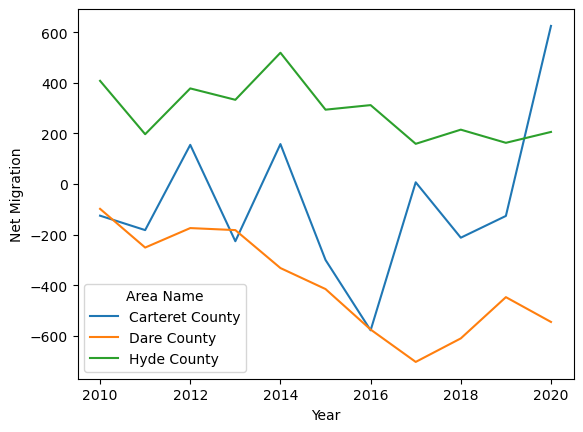

In [11]:
#Plot all three counties 
cleaned_2.groupby(['Year','Area Name'])['Net Migration'].sum().unstack().plot()

plt.ylabel("Net Migration")
